# 0. Basic

In [1]:
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

d:\projects\ml_pipeline\mlp-demo\kaggle-titanic-demo\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

In [3]:
train_df = context.catalog.load("train_raw")
test_df = context.catalog.load("test_raw")

display(train_df)
display(test_df)

combined_df = concat_df(train_df, test_df)

2020-10-21 15:36:45,661 - kedro.io.data_catalog - INFO - Loading data from `train_raw` (CSVDataSet)...
2020-10-21 15:36:45,682 - kedro.io.data_catalog - INFO - Loading data from `test_raw` (CSVDataSet)...


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
display(train_df.info())
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

# 1. Age

check correlation between features to support filling missing data

In [5]:
def feature_correlation(df, feature=None):
    df_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
    df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
    if feature is not None:
        df_corr = df_corr[df_corr['Feature 1'] == feature]
    return df_corr

display(feature_correlation(combined_df, 'Age'))

,Feature 1,Feature 2,Correlation Coefficient
6,Age,Age,1.000000
9,Age,Pclass,0.408106
17,Age,SibSp,0.243699
22,Age,Fare,0.178740
25,Age,Parch,0.150917
29,Age,Survived,0.077221
41,Age,PassengerId,0.028814


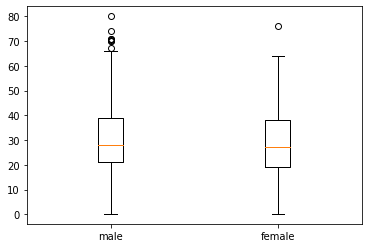

'median age of male:'

28.0

'median age of female:'

27.0

In [6]:
def filter_by_sex(df, is_male):
    return df[df['Sex'] == ('male' if is_male else 'female')]


male_df = filter_by_sex(combined_df, is_male=True)
female_df = filter_by_sex(combined_df, is_male=False)

fig, ax = plt.subplots()
ax.boxplot([male_df['Age'].dropna().values, female_df['Age'].dropna().values], labels=['male', 'female'])
plt.show()

display('median age of male:', male_df['Age'].median())
display('median age of female:', female_df['Age'].median())

### Preprocessing 
will fill age by median of passagers with same Pclass and Sex

# 2. Embarked, Fare and Cabin
Omitted, follow the kaggle example

# 3. Categorical Columns

In [7]:
context.run()

2020-10-21 15:36:46,074 - root - INFO - ** Kedro project kaggle-titanic-demo
2020-10-21 15:36:46,335 - kedro.io.data_catalog - INFO - Loading data from `train_raw` (CSVDataSet)...
2020-10-21 15:36:46,340 - kedro.io.data_catalog - INFO - Loading data from `test_raw` (CSVDataSet)...
2020-10-21 15:36:46,344 - kedro.pipeline.node - INFO - Running node: Combine raw data: combine_kaggle_dataset([test_raw,train_raw]) -> [combined_raw]
2020-10-21 15:36:46,348 - kedro.io.data_catalog - INFO - Saving data to `combined_raw` (CSVDataSet)...
2020-10-21 15:36:46,362 - kedro.runner.sequential_runner - INFO - Completed 1 out of 8 tasks
2020-10-21 15:36:46,363 - kedro.io.data_catalog - INFO - Loading data from `combined_raw` (CSVDataSet)...
2020-10-21 15:36:46,369 - kedro.pipeline.node - INFO - Running node: clean "Embarked": get_filled_embarked([combined_raw]) -> [preprocessed_embarked]
2020-10-21 15:36:46,371 - kedro.io.data_catalog - INFO - Saving data to `preprocessed_embarked` (PickleDataSet)...
2

{}

In [8]:
master_table = context.catalog.load('master_table')

master_table

2020-10-21 15:36:46,520 - kedro.io.data_catalog - INFO - Loading data from `master_table` (CSVDataSet)...


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_test_set,Deck,Title,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,M,Mr,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,ABC,Mrs,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,M,Miss,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,ABC,Mrs,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,M,Mr,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S,True,M,Mr,Spector
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,True,ABC,Dona,Oliva y Ocana
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,True,M,Mr,Saether
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S,True,M,Mr,Ware


In [9]:
master_table.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_test_set', 'Deck',
       'Title', 'Surname'],
      dtype='object')

In [10]:
master_table['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [11]:
master_table['Sex'].unique()

array(['male', 'female'], dtype=object)

In [12]:
master_table['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [13]:
master_table['Deck'].unique()

array(['M', 'ABC', 'DE', 'FG'], dtype=object)

In [15]:
master_table['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [16]:
master_table['Surname'].unique()

array(['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', 'Moran',
       'McCarthy', 'Palsson', 'Johnson', 'Nasser', 'Sandstrom', 'Bonnell',
       'Saundercock', 'Andersson', 'Vestrom', 'Hewlett', 'Rice',
       'Williams', 'Vander Planke', 'Masselmani', 'Fynney', 'Beesley',
       'McGowan', 'Sloper', 'Asplund', 'Emir', 'Fortune', 'ODwyer',
       'Todoroff', 'Uruchurtu', 'Spencer', 'Glynn', 'Wheadon', 'Meyer',
       'Holverson', 'Mamee', 'Cann', 'NicolaYarred', 'Ahlin', 'Turpin',
       'Kraeff', 'Laroche', 'Devaney', 'Rogers', 'Lennon', 'ODriscoll',
       'Samaan', 'ArnoldFranchi', 'Panula', 'Nosworthy', 'Harper',
       'Faunthorpe', 'Ostby', 'Woolner', 'Rugg', 'Novel', 'West',
       'Goodwin', 'Sirayanian', 'Icard', 'Harris', 'Skoog', 'Stewart',
       'Moubarek', 'Nye', 'Crease', 'Kink', 'Jenkin', 'Hood',
       'Chronopoulos', 'Bing', 'Moen', 'Staneff', 'Moutal', 'Caldwell',
       'Dowdell', 'Waelens', 'Sheerlinck', 'McDermott', 'Carrau', 'Ilett',
       'Backstrom', '